In [1]:
#importing the libraries
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from time import time
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from mrmr import mrmr_classif
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Hotel Reservations.csv')

# EDA

In [3]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 36275 rows and 19 columns


In [4]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [5]:
types=dict(Counter(df.dtypes))
print(f'In our data we do have 5 columns with string data type (categorical), 13 columns of integers and 1 column of float')

In our data we do have 5 columns with string data type (categorical), 13 columns of integers and 1 column of float


In [6]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
print('There are no missing values in our dataset')

There are no missing values in our dataset


### Number of adults

In [8]:
df['no_of_adults'].value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

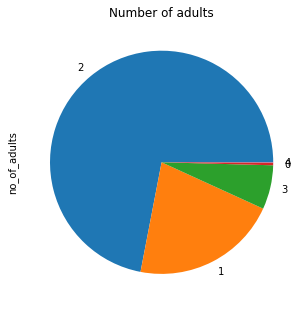

In [9]:
plt.figure(figsize=(5,10))
df['no_of_adults'].value_counts().plot(kind='pie')
plt.title('Number of adults');

### Number of children

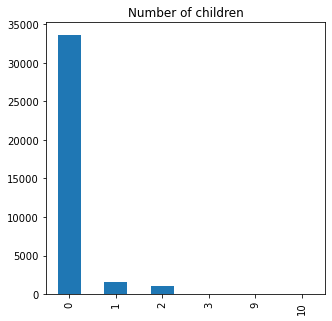

In [10]:
plt.figure(figsize=(5,5))
df['no_of_children'].value_counts().plot(kind='bar')
plt.title('Number of children');

### Meal Plan

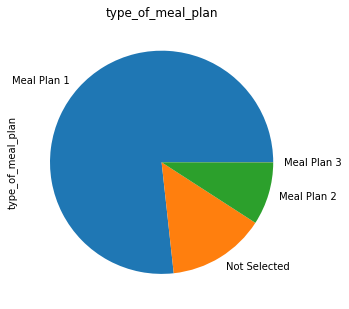

In [11]:
plt.figure(figsize=(5,10))
df['type_of_meal_plan'].value_counts().plot(kind='pie')
plt.title('type_of_meal_plan');

### Required Car Space

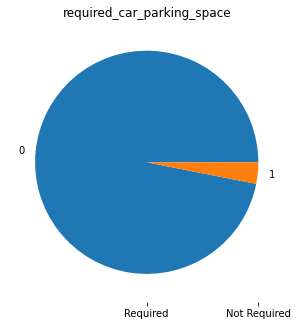

In [12]:
plt.figure(figsize=(5,10))
df['required_car_parking_space'].value_counts().plot(kind='pie')
plt.title('required_car_parking_space')
plt.ylabel('')
plt.xticks([0,1],['Required','Not Required']);

### Average Price per room category

In [13]:
df[['room_type_reserved','avg_price_per_room']].groupby('room_type_reserved').mean()

,avg_price_per_room
room_type_reserved,
Room_Type 1,95.918532
Room_Type 2,87.848555
Room_Type 3,73.678571
Room_Type 4,125.287317
Room_Type 5,123.733623
Room_Type 6,182.212836
Room_Type 7,155.198291


### Arrival year

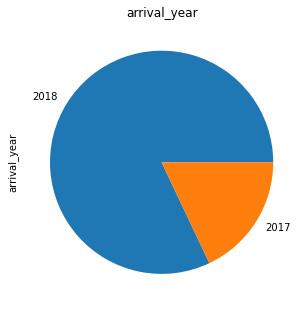

In [14]:
# We do only have data for 2017 and 2018
plt.figure(figsize=(5,10))
df['arrival_year'].value_counts().plot(kind='pie')
plt.title('arrival_year');

### Correlation matrix

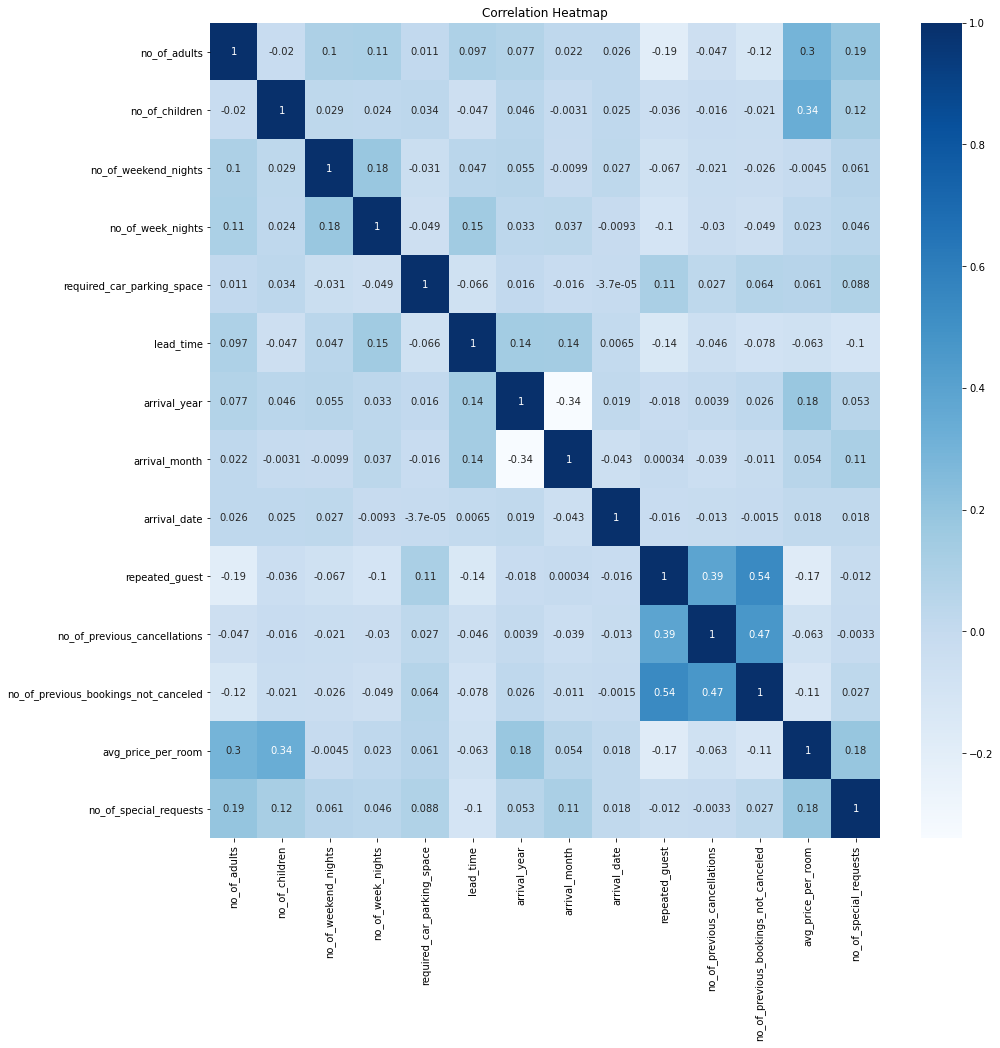

In [15]:
plt.figure(figsize=(15, 15))
plt.title("Correlation Heatmap")
heatmap = sns.heatmap(df.corr(), annot=True, cmap="Blues")

# Linear Regression - Predict the average cost per room

In [16]:
# Categorical columns
df.dtypes[df.dtypes==object]

Booking_ID             object
type_of_meal_plan      object
room_type_reserved     object
market_segment_type    object
booking_status         object
dtype: object

In [17]:
df['booking_status']=df['booking_status'].replace(to_replace=['Not_Canceled', 'Canceled'], value = [1,0])

In [18]:
# We chose to drop Booking Id because this column did not added any value in our analysis.
X1=df.drop(['Booking_ID','avg_price_per_room'], 1)

In [19]:
y1=df['avg_price_per_room']

In [20]:
X1=pd.get_dummies(X1)

In [45]:
#By getting dummies we ended up with 30 columns from 19 we fistly had'
X1

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,...,0,1,0,0,0,0,0,0,0,1
36271,2,0,1,3,0,228,2018,10,17,0,...,0,0,0,0,0,0,0,0,0,1
36272,2,0,2,6,0,148,2018,7,1,0,...,0,0,0,0,0,0,0,0,0,1
36273,2,0,0,3,0,63,2018,4,21,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
# We split our data -train-test and we do perform a Linear regression
X_train, X_test, y_train, y_test = train_test_split(X1, y1,test_size=0.33, random_state=42)
reg = LinearRegression(n_jobs=-1)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))

0.512836167281064


In [23]:
reg.coef_

array([ 9.24591698e+00,  1.10568844e+01, -3.03618003e+00, -1.05698018e+00,
        9.28860791e+00, -8.09163876e-02,  1.73724393e+01,  1.56213100e+00,
       -1.59608349e-02, -1.30009963e+01, -5.74177195e-02, -3.46012465e-01,
        2.95310855e+00, -1.02917589e+01, -9.10075522e+00,  1.51862337e+01,
        1.55817158e+01, -2.16671943e+01, -2.38370663e+01, -3.52107122e+01,
       -1.33754522e+01, -6.46998707e+00,  9.90727166e+00,  3.18108267e+01,
        3.71751193e+01,  2.19491300e+01, -8.09314021e+01,  1.35460180e+01,
        1.70590640e+01,  2.83771900e+01])

In [24]:
residuals=y_pred-y_test

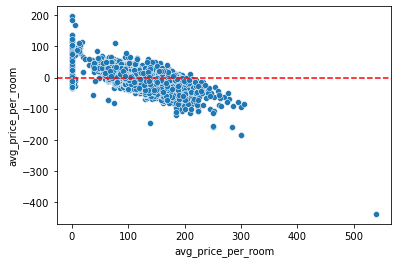

In [25]:
sns.scatterplot(x=y_test,y=residuals)
plt.axhline(y=0,color='r',ls='--')

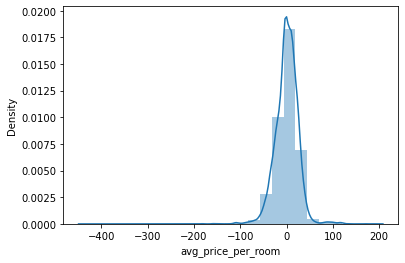

In [26]:
sns.distplot(residuals,bins=25,kde=True);

# Classification Problem - Cancelled or not the reservation

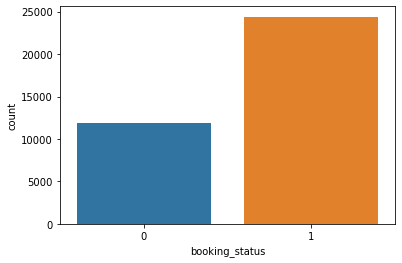

In [27]:
sns.countplot(x = df['booking_status']);

In [28]:
df['booking_status'].value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

In [29]:
# As before we split into X and y
X=df.drop(['Booking_ID','booking_status'], 1)
y=df['booking_status']

In [30]:
# We get dummies. We do have now 30 columns
X=pd.get_dummies(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

In [32]:
y_test.value_counts()

1    4878
0    2377
Name: booking_status, dtype: int64

In [33]:
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [34]:
# LogisticRegression, KNeighborsClassifier, SVC, GaussianNB
scaler = StandardScaler()
logreg=LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
bayes = GaussianNB()
randomf= RandomForestClassifier()

In [35]:
# The best classifier is the RandomForest
clfs = [logreg, svm, knn, bayes,randomf]
macro2=[]
for clf in clfs:
    pipeline = Pipeline([('process1', scaler), ('process2',clf)])
    pipeline.fit(X_smote, y_smote)
    y_pred= pipeline.predict(X_test)
    print(f'Classifier: {clf}')
    print(classification_report(y_test, y_pred))
    print(60 * '-')
    report = classification_report(y_test, y_pred, output_dict=True)
    macro2.append( report['macro avg']['f1-score'])
    macro_f1_rf=report['macro avg']['f1-score']

Classifier: LogisticRegression()
              precision    recall  f1-score   support

           0       0.67      0.72      0.70      2377
           1       0.86      0.83      0.84      4878

    accuracy                           0.79      7255
   macro avg       0.77      0.78      0.77      7255
weighted avg       0.80      0.79      0.80      7255

------------------------------------------------------------
Classifier: SVC()
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      2377
           1       0.89      0.86      0.87      4878

    accuracy                           0.83      7255
   macro avg       0.81      0.82      0.81      7255
weighted avg       0.83      0.83      0.83      7255

------------------------------------------------------------
Classifier: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      2377
           1       0.89      

In [36]:
macro2

[0.7699432414619929,
 0.8117932806022534,
 0.8256653349860279,
 0.3850298291548605,
 0.8917677153319961]

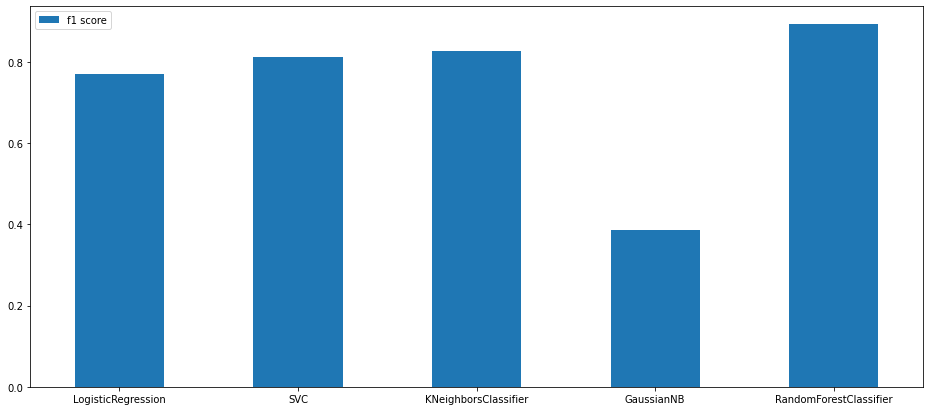

In [37]:
index=['LogisticRegression', 'SVC', 'KNeighborsClassifier', 'GaussianNB', 'RandomForestClassifier']
df2=pd.DataFrame({'f1 score' : macro2}, index=index)
ax = df2.plot.bar(rot=0, figsize=(16, 7))

### Grid search- RandomForest

In [38]:
rfc = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 300, 600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None ,5, 7, 9],
}

grid_rfc_fh = GridSearchCV(estimator=rfc,
                           param_grid=param_grid,
                           verbose=1,
                           n_jobs=-1,
                           scoring='f1',
                           cv=3)
grid_rfc_fh.fit(X_smote, y_smote)
print(40 * "-")
print(grid_rfc_fh.best_params_)
print(40 * "-")
print(grid_rfc_fh.best_estimator_)
print(40 * "-")
grid_predictions = grid_rfc_fh.predict(X_test)
print(classification_report(y_test, grid_predictions))
print(40 * "-")
#confusion_matrix(y_test, grid_rfc_fh.predict(X_test))

report = classification_report(y_test, grid_predictions, output_dict=True)
macro_f1_rfc_fh = report['macro avg']['f1-score']

Fitting 3 folds for each of 36 candidates, totalling 108 fits
----------------------------------------
{'max_depth': None, 'max_features': 'auto', 'n_estimators': 300}
----------------------------------------
RandomForestClassifier(max_features='auto', n_estimators=300, random_state=42)
----------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      2377
           1       0.92      0.94      0.93      4878

    accuracy                           0.90      7255
   macro avg       0.89      0.89      0.89      7255
weighted avg       0.90      0.90      0.90      7255

----------------------------------------


# MR- MR

In [39]:
selected_cols = mrmr_classif(pd.DataFrame(X_smote, columns = X.columns), y_smote.values, K=15)
selected_cols

100%|██████████| 15/15 [00:02<00:00,  5.91it/s]


['lead_time',
 'no_of_special_requests',
 'arrival_year',
 'repeated_guest',
 'type_of_meal_plan_Meal Plan 1',
 'required_car_parking_space',
 'avg_price_per_room',
 'market_segment_type_Corporate',
 'market_segment_type_Complementary',
 'market_segment_type_Online',
 'no_of_previous_bookings_not_canceled',
 'room_type_reserved_Room_Type 2',
 'no_of_week_nights',
 'room_type_reserved_Room_Type 5',
 'type_of_meal_plan_Meal Plan 2']

In [40]:
X_mrmr = X_smote[selected_cols]
X_test_mr=X_test[selected_cols]

In [41]:
model=RandomForestClassifier(n_estimators=300, random_state=42)

In [47]:
model.fit(X_mrmr,y_smote)
# predictions
model_predict = model.predict(X_test_mr)

print("=== Classification Report ===")
print(classification_report(y_test, model_predict))
report3 = classification_report(y_test, model_predict, output_dict=True)
macro_f1_rfc_mrmr = report3['macro avg']['f1-score']

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      2377
           1       0.92      0.91      0.91      4878

    accuracy                           0.88      7255
   macro avg       0.87      0.87      0.87      7255
weighted avg       0.88      0.88      0.88      7255



In [48]:
macro_f1_rfc_mrmr

0.8693281172647958

In [49]:
df2

,f1 score
Original,0.891768
Grid-Search,0.890967
MR-MR,0.890967


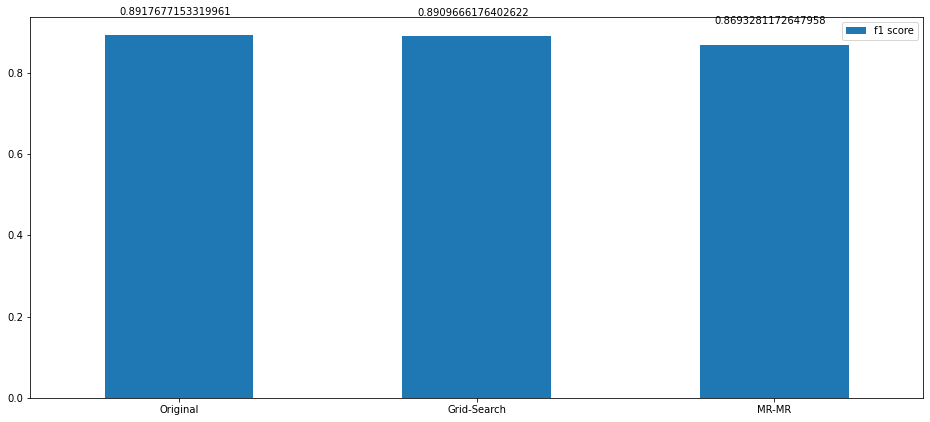

In [50]:
rf = [macro_f1_rf,macro_f1_rfc_fh,macro_f1_rfc_mrmr]
index=['Original', 'Grid-Search', 'MR-MR']
df2=pd.DataFrame({'f1 score' : rf}, index=index)
ax = df2.plot.bar(rot=0, figsize=(16, 7))
bars = plt.bar(x=df2.index, height=df2['f1 score'], width=.4)
for bar in bars:
    yval=bar.get_height()
    plt.text(bar.get_x(),yval + 0.05, yval)
plt.show()